


Epoch 1/20

190/190 [==============================] - 3s 7ms/step - loss: 0.0691 - val_loss: 0.0416
Epoch 2/20
190/190 [==============================] - 1s 6ms/step - loss: 0.0332 - val_loss: 0.0282
Epoch 3/20
190/190 [==============================] - 1s 6ms/step - loss: 0.0249 - val_loss: 0.0226
Epoch 4/20
190/190 [==============================] - 1s 6ms/step - loss: 0.0212 - val_loss: 0.0201
Epoch 5/20
190/190 [==============================] - 1s 5ms/step - loss: 0.0191 - val_loss: 0.0183
Epoch 6/20
190/190 [==============================] - 1s 6ms/step - loss: 0.0173 - val_loss: 0.0169
Epoch 7/20
190/190 [==============================] - 1s 6ms/step - loss: 0.0160 - val_loss: 0.0157
Epoch 8/20
190/190 [==============================] - 1s 6ms/step - loss: 0.0152 - val_loss: 0.0151
Epoch 9/20
190/190 [==============================] - 1s 6ms/step - loss: 0.0145 - val_loss: 0.0143
Epoch 10/20
190/190 [==============================] - 1s 6ms/step - loss: 0.0139 - val_loss: 0.

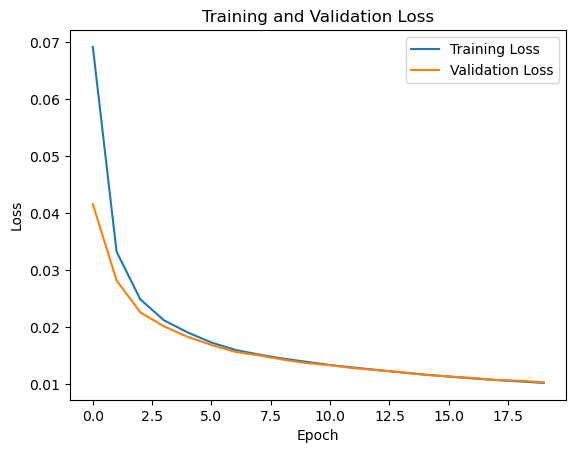

4/4 [==============================] - 0s 2ms/step
Number of detected anomalies: 42 out of 100 samples


In [1]:
# a. Import required libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# b. Upload/access the dataset (Using MNIST as an example)
# Load MNIST dataset
(train_images, _), (test_images, _) = tf.keras.datasets.mnist.load_data()

# Normalize the pixel values between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape the data for the autoencoder (flatten the images)
train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))

# Use only a part of the dataset to simulate "normal" data (e.g., only '0' class for normal)
# Here, we take a subset of the dataset for demonstration
normal_train_images, normal_test_images = train_test_split(train_images, test_size=0.1)

# c. The encoder converts it into a latent representation
latent_dim = 64  # Latent space dimension

# Encoder Network
encoder = models.Sequential([
    layers.Input(shape=(28 * 28,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(latent_dim, activation='relu')  # Latent representation
])

# d. Decoder network converts it back to the original input
# Decoder Network
decoder = models.Sequential([
    layers.Input(shape=(latent_dim,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(28 * 28, activation='sigmoid')  # Output with the same shape as the input
])

# Autoencoder: Encoder + Decoder
autoencoder = models.Sequential([encoder, decoder])

# e. Compile the models with Optimizer, Loss, and Evaluation Metrics
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
history = autoencoder.fit(normal_train_images, normal_train_images, 
                          epochs=20, 
                          batch_size=256,
                          validation_split=0.1,
                          verbose=1)

# Evaluate the model on the test set (normal data)
mse_loss = autoencoder.evaluate(normal_test_images, normal_test_images)
print(f'MSE Loss on Normal Test Data: {mse_loss:.4f}')

# f. Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Anomaly detection: Compare the reconstruction error on normal vs anomaly data
# Generate anomalies (e.g., using digit '1' as anomalies)
anomaly_data = test_images[:100]  # Randomly taking first 100 images as "anomalies"
reconstructed_anomaly = autoencoder.predict(anomaly_data)

# Calculate Mean Squared Error (MSE) between original and reconstructed images
mse_anomalies = np.mean(np.power(anomaly_data - reconstructed_anomaly, 2), axis=1)

# Threshold for anomaly detection
threshold = mse_loss  # Use the normal data MSE as a threshold

# Detect anomalies
anomalies = mse_anomalies > threshold

# Print out the result
print(f"Number of detected anomalies: {np.sum(anomalies)} out of {len(anomalies)} samples")
